## Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_regression

## Loading the dataset

In [19]:
df = pd.read_csv('obesity_data.csv')

## Descriptive statistics
* Calculated for all columns, regardless of their data type. This includes numerical and categorical columns.

In [20]:
df.describe(include='all')

Age Gender       Height       Weight          BMI  \
count   1000.000000   1000  1000.000000  1000.000000  1000.000000   
unique          NaN      2          NaN          NaN          NaN   
top             NaN   Male          NaN          NaN          NaN   
freq            NaN    523          NaN          NaN          NaN   
mean      49.857000    NaN   170.052417    71.205769    24.888317   
std       18.114267    NaN    10.309971    15.509849     6.193912   
min       18.000000    NaN   136.115719    26.065730     8.470572   
25%       35.000000    NaN   163.514205    61.129629    20.918068   
50%       50.000000    NaN   169.801665    71.929072    24.698647   
75%       66.000000    NaN   177.353596    81.133746    28.732132   
max       79.000000    NaN   201.419670   118.907366    50.791898   

        PhysicalActivityLevel ObesityCategory  
count             1000.000000            1000  
unique                    NaN               4  
top                       NaN   Normal weight  
freq                      NaN             371  
mean                 2.534000             NaN  
std                  1.116284             NaN  
min                  1.000000             NaN  
25%                  2.000000             NaN  
50%                  3.000000             NaN  
75%                  4.000000             NaN  
max                  4.000000             NaN

## Size structure and data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


### Dataset preview

In [22]:
df.head(10)

Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   
5   25  Female  166.405627  61.145868  22.081628                      4   
6   78    Male  183.566334  92.208521  27.364341                      3   
7   38    Male  142.875095  59.359746  29.078966                      1   
8   56    Male  183.478558  75.157672  22.325577                      4   
9   75    Male  182.974061  81.533460  24.353244                      2   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  
5   Normal weight  
6      Overweight  
7      Overweight  
8   Normal weight  
9   Normal weight

# Data Exploration

## Distribution of 'Obesity Category'

Unique values in the 'Obesity Category' column:
['Normal weight' 'Obese' 'Overweight' 'Underweight']


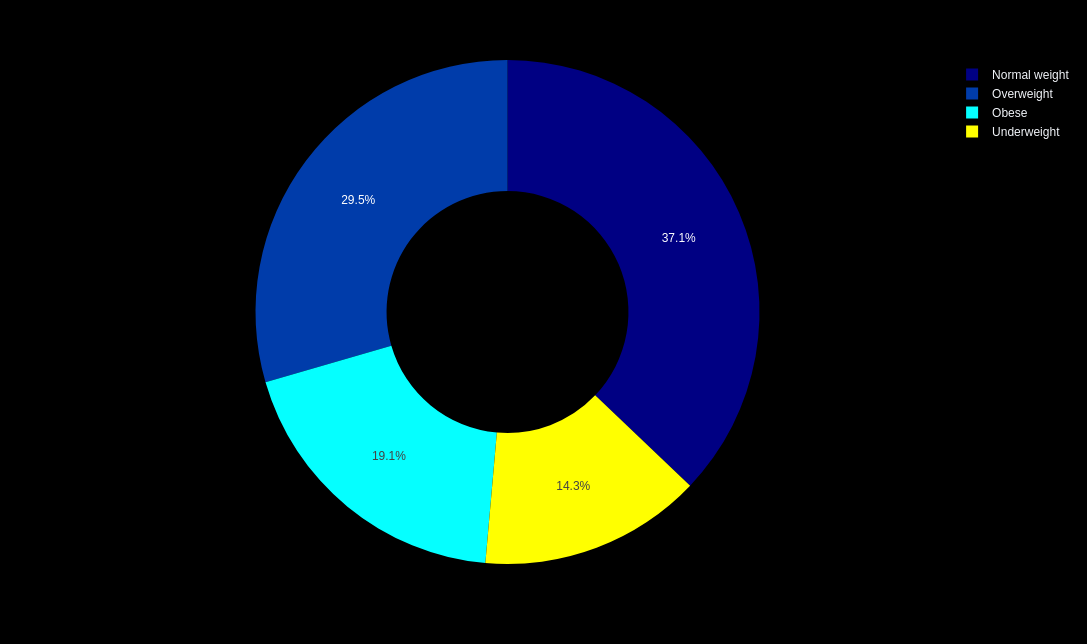

In [23]:
unique_obesitycategory_values = df['ObesityCategory'].unique()

print("Unique values in the 'Obesity Category' column:")
print(unique_obesitycategory_values)

fig = px.pie(unique_obesitycategory_values, names=df['ObesityCategory'], hole=0.48,
             color_discrete_sequence=px.colors.sequential.Jet)
fig.update_layout(template='plotly_dark',
                  width=644, height=644,
                  plot_bgcolor='rgba(0,0,0,1)',
                  paper_bgcolor='rgba(0,0,0,1)'
)

# Show the plot
fig.show()

fig.write_html("obesity_distribution.html")

### Insights:
* _**19.1%**_ of the dataset comprises the <u>Obese</u> category, indicating a significant portion of individuals falling into this classification.
* The largest portion of the dataset comprises the <u>Normal weight</u> category, accounting for _**37.1%**_ of the total, suggesting a prevalent weight status among the population.
* Conversely, the <u>Underweight</u> category represents the smallest portion, constituting only _**14.3%**_ of the dataset, indicating a relatively lesser occurrence within the dataset.

### Challenges:
* If an attempt is made to recategorize the entire dataset into <u>Obese</u> and <u>Non-obese</u> categories, a larger proportion would likely fall under <u>Non-obese</u>, potentially resulting in an imbalanced dataset. This imbalance could pose challenges for certain machine learning algorithms or statistical analyses that are sensitive to class distribution imbalances.

## Gender ratio of the survivors

Unique values in the 'Gender' column:
['Male' 'Female']


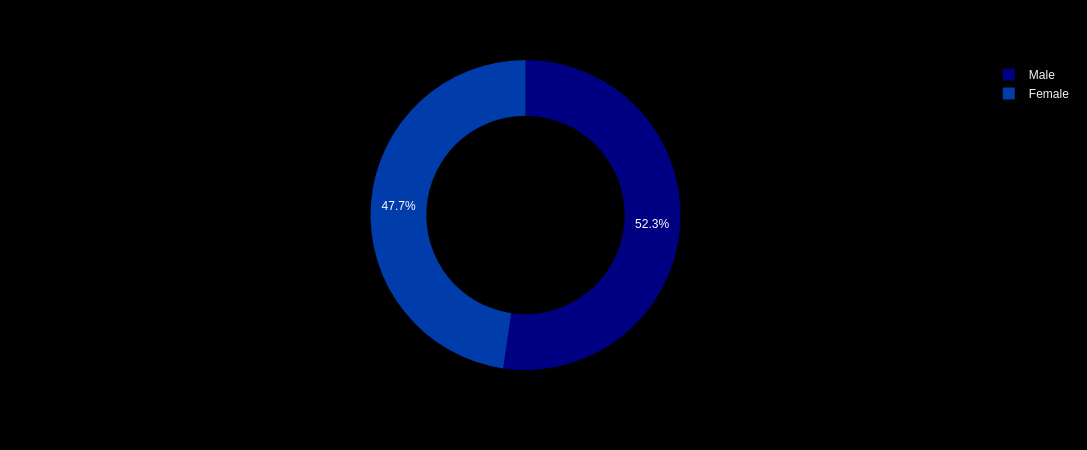

In [24]:
unique_gender_values = df['Gender'].unique()

print("Unique values in the 'Gender' column:")
print(unique_gender_values)

fig = px.pie(unique_gender_values, names=df['Gender'], hole=0.64, color_discrete_map={'Male': 'blue', 'Female': 'red'}, color_discrete_sequence=px.colors.sequential.Jet)
fig.update_layout(template='plotly_dark', width=450, height=450,
                  plot_bgcolor='rgba(0,0,0,1)',
                  paper_bgcolor='rgba(0,0,0,1)')
fig.show()

fig.write_html("gender_distribution.html")

### Insights:
* The dataset comprises _**47.7%**_ females.
* If used in feature engineering, this should be a <u>reliable metric</u>.

### Insights:
* Higher 'BMI' accompanied by less height _**146**_ and lower physical activity levels _**2**_ may correlate to obesity risks compared to the people with more height _**187**_
* Every plane representing _**PhysicalActivityLevel**_ shows similar distribution of BMI across various _**Height**_ and _**Weight**_

In [25]:
# Encoding 'ObesityCategory'

#df_encoded = pd.get_dummies(df, columns=['ObesityCategory'], prefix='')
#print(df_encoded.head())

In [26]:
# Box plot for 'Age'

#fig = px.box(df, x='Age', y='BMI', color='Age', color_discrete_sequence=px.colors.sequential.Jet)
#fig.update_layout(template='plotly_dark', width=1920, height=1000)
#fig.show()

## Age categorization

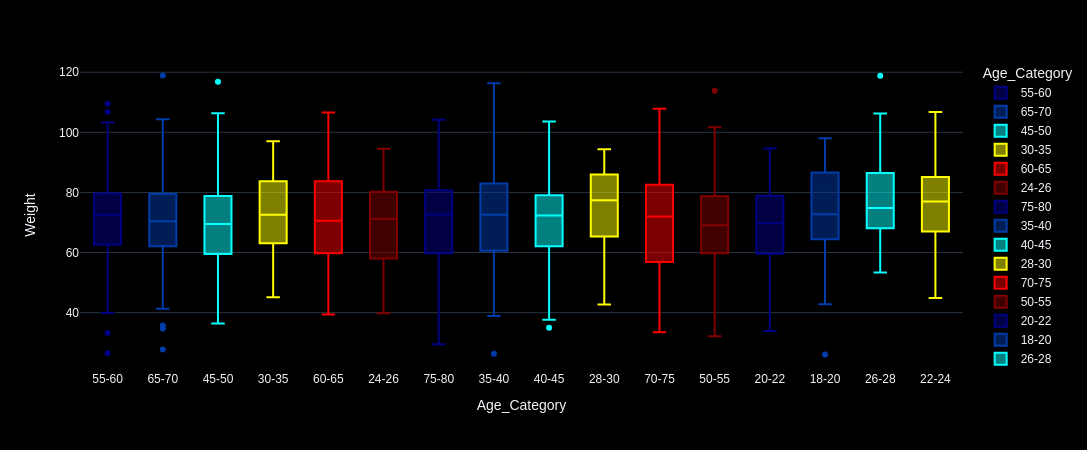

In [27]:
# Define the age bins and labels
bins = [16, 18, 20, 22, 24, 26, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['16-18', '18-20', '20-22', '22-24', '24-26', '26-28', '28-30', '30-35', '35-40', '40-45', '45-50',
          '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']

# Create a new column 'Age_Category' based on the bins
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Generate synthetic data for additional points
X_synthetic, _ = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)
y_synthetic = np.random.uniform(df['Weight'].min(), df['Weight'].max(), 500)

# Create DataFrame for synthetic data
df_synthetic = pd.DataFrame({'Age': X_synthetic.flatten(), 'Weight': y_synthetic})

# Assign synthetic data to existing Age categories
df_synthetic['Age_Category'] = pd.cut(df_synthetic['Age'], bins=bins, labels=labels, right=False)

# Concatenate original and synthetic data
df_concatenated = pd.concat([df, df_synthetic])

# Create the box plot
fig = px.box(df_concatenated, x='Age_Category', y='Weight', color='Age_Category', 
             color_discrete_sequence=px.colors.sequential.Jet)

# Customize the layout
fig.update_layout(template='plotly_dark', width=644, height=450, plot_bgcolor='rgba(0,0,0,1)',
    paper_bgcolor='rgba(0,0,0,1)'
)

# Show the plot
fig.show()
fig.write_html("boxplot.html")

## Correlation analysis between Age and BMI

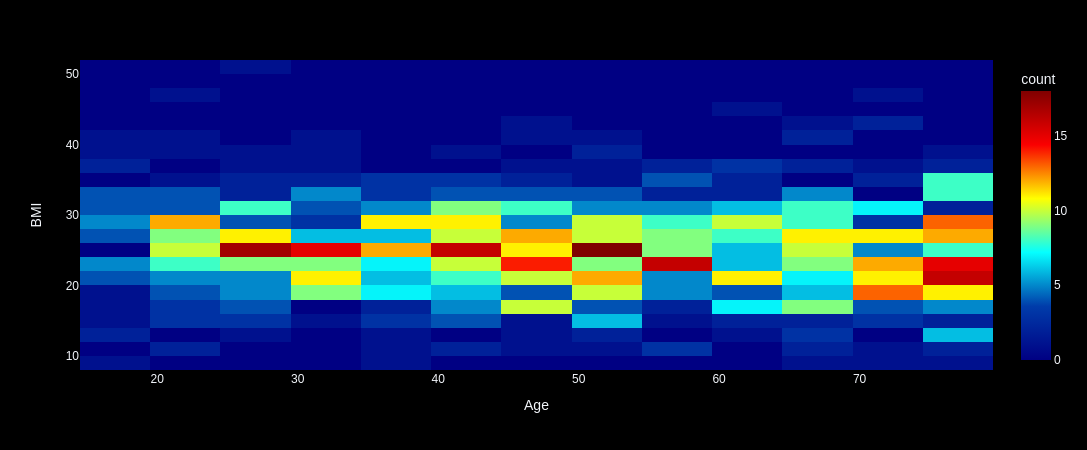

In [28]:
fig = px.density_heatmap(df, x='Age', y='BMI', nbinsx=25, nbinsy=25, color_continuous_scale=px.colors.sequential.Jet)

# Update the layout of the figure
fig.update_layout(template='plotly_dark', width=450, height=450)

# Display the figure
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,1)',  # Background color
    paper_bgcolor='rgba(0,0,0,1)'  # Background color for the paper (outside plot area)
)

fig.show()
fig.write_html("correlation.html")

## Weight category distribution

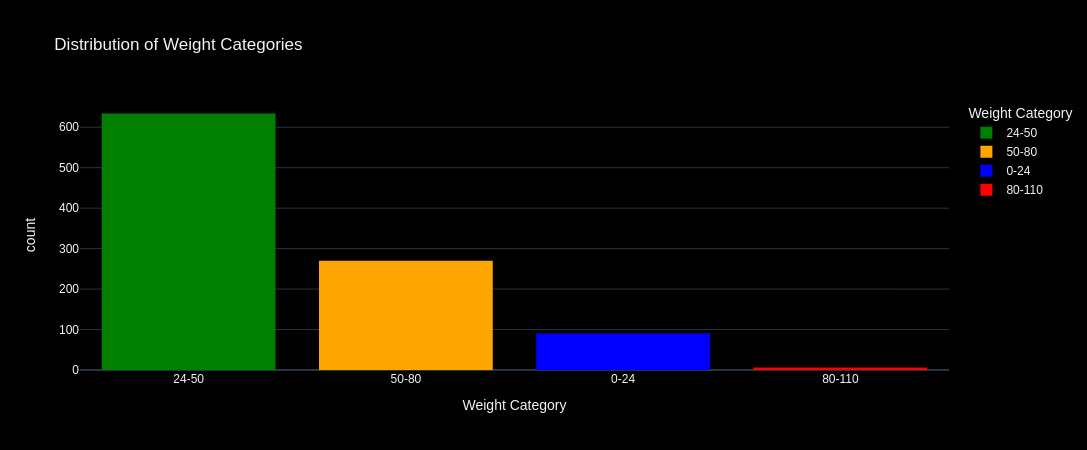

In [31]:
bins = [24, 50, 80, 110, 120]
labels = ['0-24', '24-50', '50-80', '80-110']

# Create a new column 'Weight_Category' based on the bins
df['Weight_Category'] = pd.cut(df['Weight'], bins=bins, labels=labels, right=True)

# Create a histogram using Plotly Express
fig = px.histogram(df, x='Weight_Category', color='Weight_Category',
                   title='Distribution of Weight Categories',
                   labels={'Weight_Category': 'Weight Category'},
                   template='plotly_dark', width=450, height=450,
                   color_discrete_map={'0-24': 'blue', '24-50': 'green', '50-80': 'orange', '80-110': 'red'})
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,1)',  # Background color
    paper_bgcolor='rgba(0,0,0,1)'  # Background color for the paper (outside plot area)
)

# Show the plot
fig.show()

fig.write_html("weight_category_distribution.html")

## Height category distribution

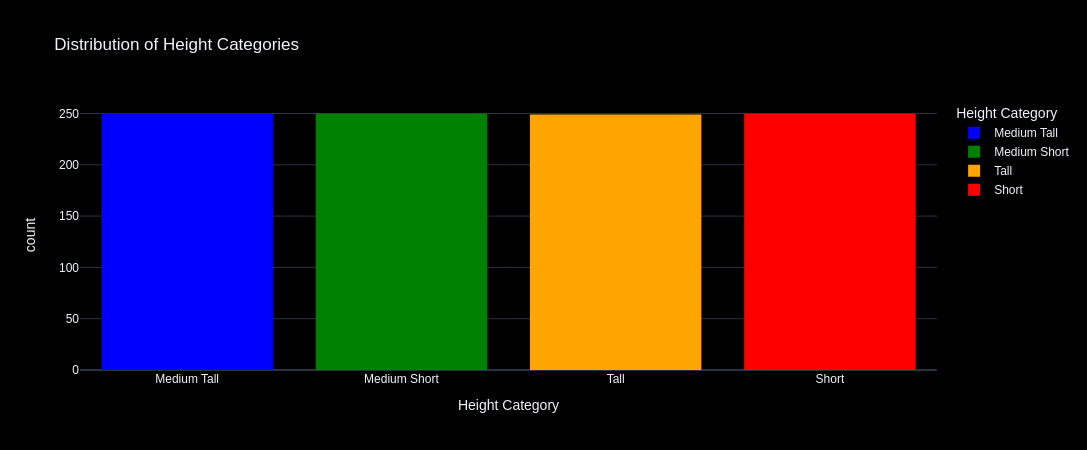

In [32]:
# Calculate quartiles
q1, q2, q3 = df['Height'].quantile([0.25, 0.5, 0.75])

# Specify bin edges
bins = [df['Height'].min(), q1, q2, q3, df['Height'].max()]

# Specify bin labels
labels = ['Short', 'Medium Short', 'Medium Tall', 'Tall']

# Create a new column 'Height_Category' based on the bins
df['Height_Category'] = pd.cut(df['Height'], bins=bins, labels=labels, right=False)

fig = px.histogram(df, x='Height_Category', color='Height_Category',
                   title='Distribution of Height Categories',
                   labels={'Height_Category': 'Height Category'},
                   template='plotly_dark', width=450, height=450,
                   color_discrete_map={'Medium Tall': 'blue', 'Medium Short': 'green', 'Tall': 'orange', 'Short': 'red'})

# Update layout to set background color
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,1)',  # Background color
    paper_bgcolor='rgba(0,0,0,1)'  # Background color for the paper (outside plot area)
)

# Show the plot
fig.show()

# Save the plot to HTML file
fig.write_html("height_category_distribution.html")

## Height : Weight ratio

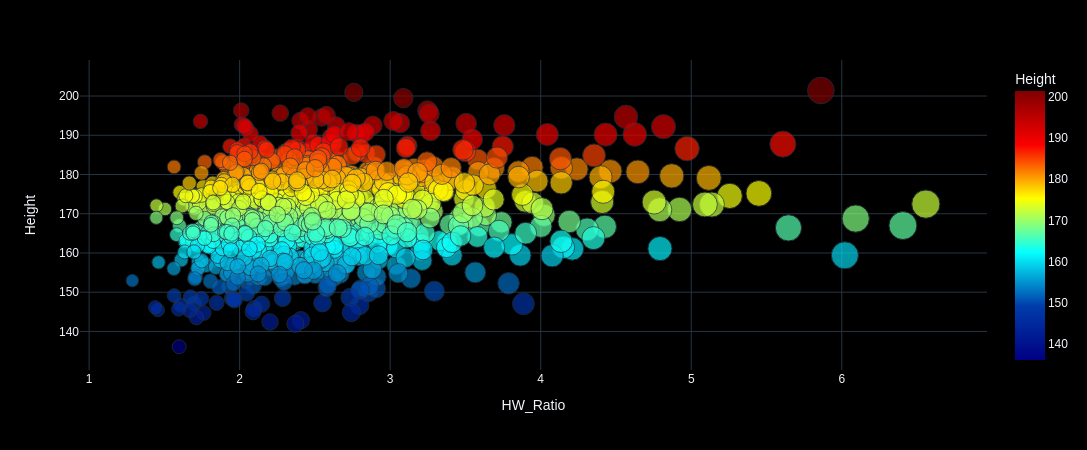

In [33]:
df['HW_Ratio'] = df['Height'] / df['Weight']

fig = px.scatter(df, x='HW_Ratio', y='Height', color='Height', size='HW_Ratio',
                 template='plotly_dark', color_continuous_scale=px.colors.sequential.Jet, width=644, height=450)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0)',
    paper_bgcolor='rgba(0,0,0)'
)

fig.show()
fig.write_html("scatterplot.html")

## BMI and PhysicalActivityLevel interaction

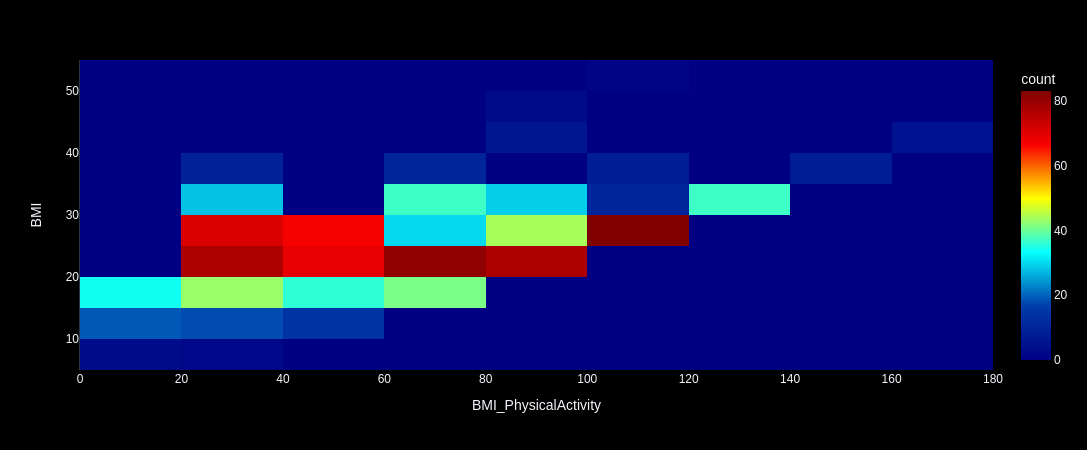

In [34]:
# Assuming df is your DataFrame with columns 'BMI' and 'PhysicalActivityLevel'
df['BMI_PhysicalActivity'] = df['BMI'] * df['PhysicalActivityLevel']

fig = px.density_heatmap(df, x='BMI_PhysicalActivity', y='BMI', nbinsx=15, nbinsy=15, color_continuous_scale=px.colors.sequential.Jet)

# Update the layout of the figure
fig.update_layout(template='plotly_dark',
                  width=450,
                  height=450,
                  paper_bgcolor='rgb(0,0,0)',
                  plot_bgcolor='rgb(0,0,0)')
fig.show()
fig.write_html("correlation_analysis_BMI_PhysicalActivityLevel.html")

## Multivariate analysis
* ### To understand how 'PhysicalActivityLevel', 'Age_Category', 'Weight_Category', 'Height_Category', 'ObesityCategory' and 'Gender' are distributed

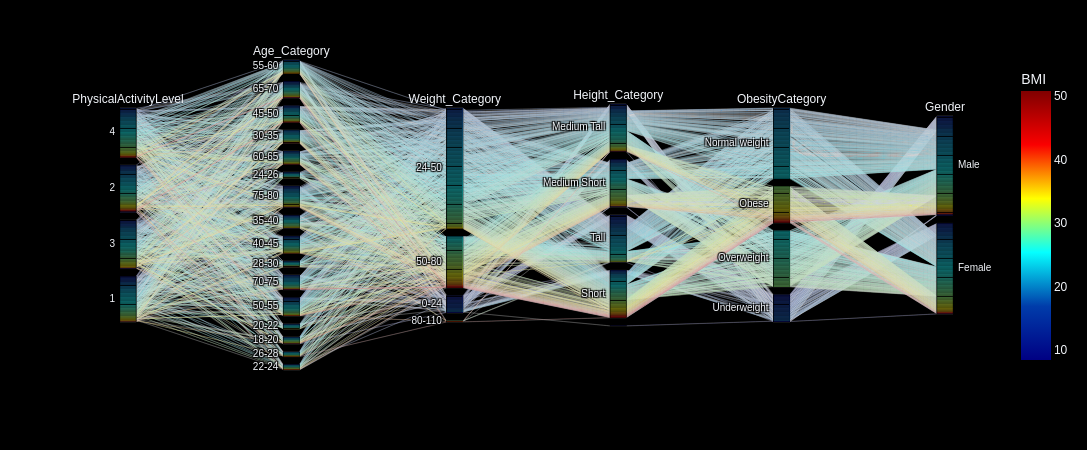

In [35]:
import plotly.express as px

fig = px.parallel_categories(df,
                             dimensions=['PhysicalActivityLevel', 'Age_Category', 'Weight_Category', 'Height_Category', 'ObesityCategory', 'Gender'],
                             color='BMI',
                             labels={'PhysicalActivityLevel': 'PhysicalActivityLevel', 'Age_Category': 'Age_Category', 'Weight_Category': 'Weight_Category',
                                     'Height_Category': 'Height_Category', 'ObesityCategory': 'ObesityCategory', 'Gender': 'Gender'},
                             color_continuous_scale='Jet'  # Choose your desired color scale
                             )
fig.update_layout(template='plotly_dark',  # Use 'plotly_dark' template for dark background
                  paper_bgcolor='rgb(0,0,0)',  # Set background color
                  plot_bgcolor='rgb(0,0,0)',   # Set plot area background color
                  width=644, height=450)
fig.show()
fig.write_html("multivariate.html")

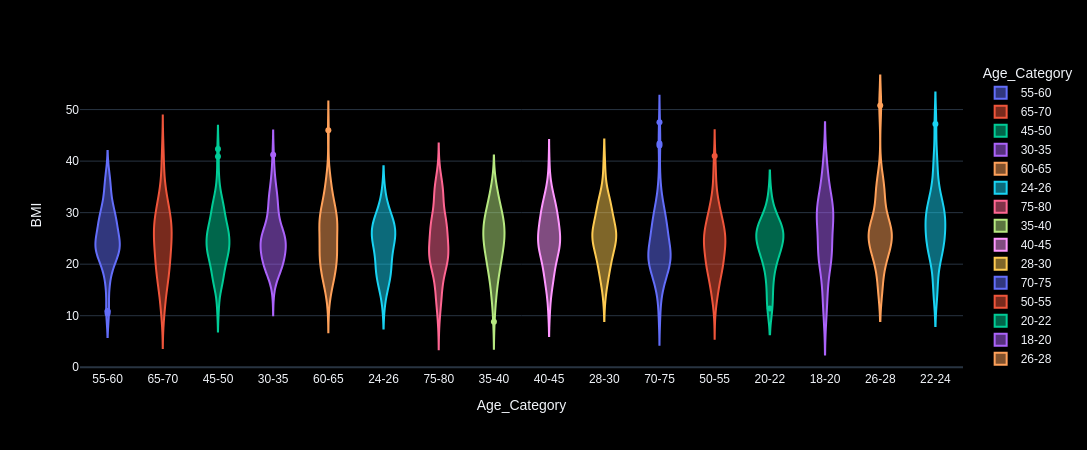

In [36]:
fig = px.violin(df, x='Age_Category', y='BMI', color='Age_Category')

fig.update_layout(template='plotly_dark', width=644, height=450, plot_bgcolor='rgba(0,0,0)',
                  paper_bgcolor='rgba(0,0,0)'
)

fig.show()
fig.write_html("violinplot.html")

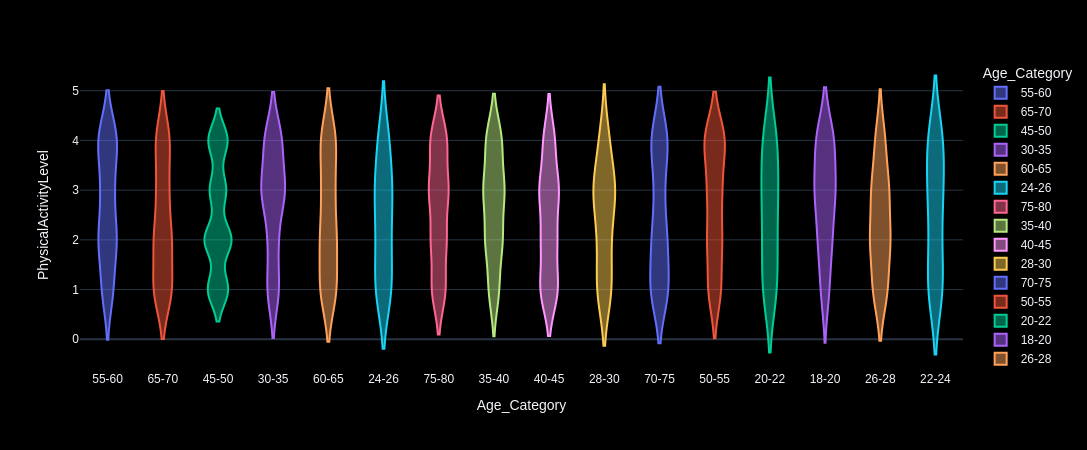

In [37]:
fig = px.violin(df, x='Age_Category', y='PhysicalActivityLevel', color='Age_Category')

fig.update_layout(template='plotly_dark', width=644, height=450, plot_bgcolor='rgba(0,0,0)',
                  paper_bgcolor='rgba(0,0,0)'
)

fig.show()
fig.write_html("violinplot.html")

In [38]:
df['Age_Category']

0      55-60
1      65-70
2      45-50
3      30-35
4      60-65
       ...  
995    18-20
996    35-40
997    45-50
998    60-65
999    65-70
Name: Age_Category, Length: 1000, dtype: category
Categories (21, object): ['16-18' < '18-20' < '20-22' < '22-24' ... '80-85' < '85-90' < '90-95' < '95-100']

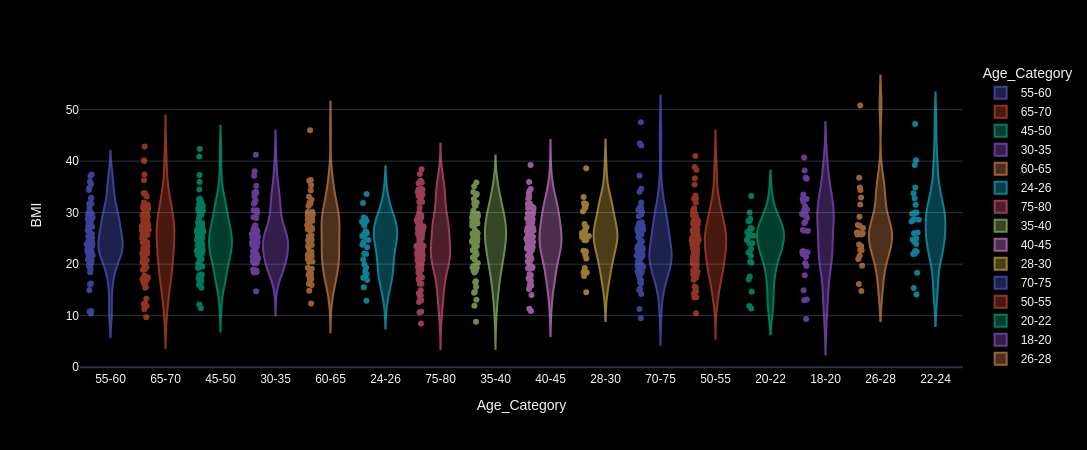

In [39]:
# Create the violin plots for each category
fig = px.violin(df, x='Age_Category', y='BMI', color='Age_Category',
                violinmode='overlay',
                points='all',  # Show all data points
                hover_data=df.columns  # Show all columns in hover tooltip
                )

# Update opacity for each violin to emphasize the gradient
for i, category in enumerate(df['Age_Category'].unique()):
    fig.data[i].update(opacity=0.6)  # Adjust opacity as needed

# Update layout
fig.update_layout(template='plotly_dark', width=644, height=450, 
                  plot_bgcolor='rgba(0,0,0)', paper_bgcolor='rgba(0,0,0)')

# Display the plot
fig.show()

# Save the plot as HTML
fig.write_html("violinplot.html")

## Scatter plot of Weight, Height, and Physical Activity Level

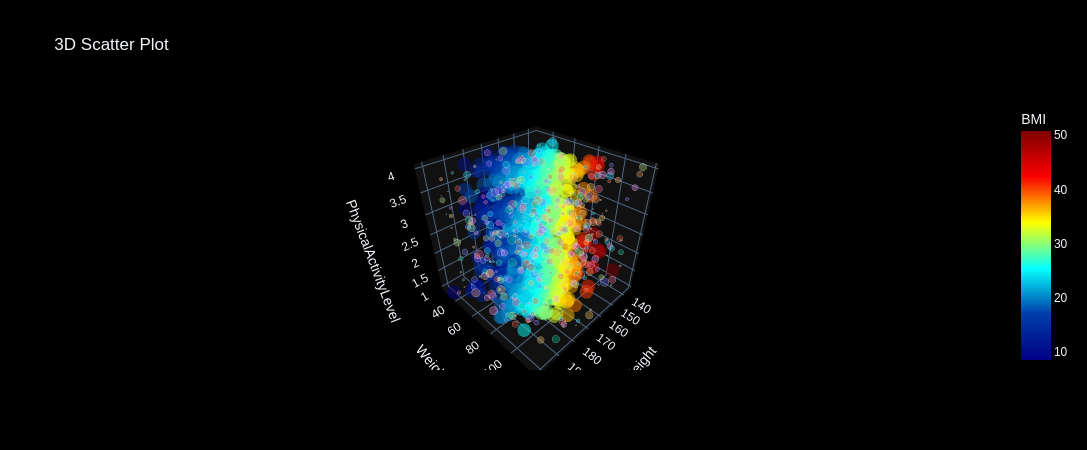

In [40]:
# Generate data points for the ripple effect
n_points = 450
x_ripple = np.random.uniform(df['Height'].min(), df['Height'].max(), n_points)
y_ripple = np.random.uniform(df['Weight'].min(), df['Weight'].max(), n_points)
z_ripple = np.random.uniform(df['PhysicalActivityLevel'].min(), df['PhysicalActivityLevel'].max(), n_points)
size_ripple = np.random.uniform(1, 10, n_points)

# Generate distinguishable colors for the ripple effect
color_ripple = np.random.choice(px.colors.qualitative.Plotly, n_points)

# Data to be displayed while hovering over the graph
hover_columns=['HW_Ratio', 'ObesityCategory', 'Gender']

# Create the base scatter plot
fig = px.scatter_3d(
    df,
    x='Height',
    y='Weight',
    z='PhysicalActivityLevel',
    color='BMI',
    width=644,
    height=644,
    title='3D Scatter Plot',
    color_continuous_scale=px.colors.sequential.Jet,
    opacity=0.5,  # Adjust the base scatter plot transparency
    hover_data=hover_columns
)

# Add the ripple effect scatter plot
fig.add_trace(
    go.Scatter3d(
        x=x_ripple,
        y=y_ripple,
        z=z_ripple,
        mode='markers',
        marker=dict(
            size=size_ripple,
            color=color_ripple,
            opacity=0.35,
            line=dict(width=0.05)
        ),
        showlegend=False
    )
)

# Set dark theme
fig.update_layout(template='plotly_dark', width=450, height=450, plot_bgcolor='rgba(0,0,0,1)',
    paper_bgcolor='rgba(0,0,0,1)'
)

fig.show()

fig.write_html("3dscatterplot.html")